<a href="https://colab.research.google.com/github/Ines8991/classification_rna/blob/main/dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [ ]:
don=pd.read_excel(r'/content/data_licence1 (2).xlsx')
don.shape

(21758, 70)

In [ ]:
don=don[['Individu - Code Etudiant','Année_N','Age au bac',
'Groupe de bac',
'Série du bac',
'IPS du lycée',
'Diplôme SISE intitulé 1 (lib.)_Année_N',
'Note Session 1_Année_N',
'Résultat Session 1_Année_N',
'Note Session 2_Année_N',
'Résultat Session 2_Année_N',
'Diplôme Evry ou Saclay_Année_N+1','Nombre d’admis VET_Année_N',"Type d\'étape_Année_N+1",'IAE - Etape (lib.)_Année_N',
         'IAE - Etape (lib.)_Année_N+1','RNA']]

In [ ]:
don.shape

(21758, 17)

In [ ]:
df=don[don['Nombre d’admis VET_Année_N']==0]
#df=don
df=df[df["Type d\'étape_Année_N+1"]=="L1"]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
data=df[df['IAE - Etape (lib.)_Année_N']==df['IAE - Etape (lib.)_Année_N+1']]
#data=df
data.shape

(4228, 17)

In [ ]:
data=data.reset_index(drop=True)

In [ ]:
dat2021=data[data['Année_N']==2021].copy()
dat2021.shape

(499, 17)

In [ ]:
dat2021=data[data['Année_N']==2021].copy()
dat2021.shape

(499, 17)

In [ ]:
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

print('Avant codage:')
print(pd.value_counts(data["RNA"]))
data["RNA"] = coding(data["RNA"], {'NonRNA':0.0,'RNA':1.0})
print('\nAprès codage:')
print(pd.value_counts(data["RNA"]))

Avant codage:
RNA       2833
NonRNA    1395
Name: RNA, dtype: int64

Après codage:
1.0    2833
0.0    1395
Name: RNA, dtype: int64


In [ ]:
dafr=data.copy()
column_names = data.columns

In [ ]:
Xnon=dafr.copy()

In [ ]:
Xnon=Xnon[Xnon['Année_N']!=2021]
del Xnon['Année_N']
Xnon=Xnon.reset_index(drop=True)

In [ ]:
del data['IAE - Etape (lib.)_Année_N+1']
del data['Nombre d’admis VET_Année_N']
del data["Type d\'étape_Année_N+1"]
del Xnon['IAE - Etape (lib.)_Année_N+1']
del Xnon['Nombre d’admis VET_Année_N']
del Xnon["Type d\'étape_Année_N+1"]

Avec les 10 variables les plus importantes sélectionnées par l'ANOVA, nous avons appliqué le one hot encoding à nos variables catégorielles

In [ ]:
import os
import re

dat_columns = data.select_dtypes(['object']).columns
data = pd.get_dummies(data, columns=dat_columns)
data.shape

(4228, 162)

In [ ]:
#data = (data - data.min()) / (data.max() - data.min())
scaler = RobustScaler()
#scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)
data=scaled_data_df.copy()
#print("Noms de colonnes d'origine :", data.columns)
#print("Noms de colonnes après le RobustScaler :", data.columns)

In [ ]:
data['RNA'] = data['RNA'].replace({0.0: 1, -1.0: 0})

In [ ]:
del data['Individu - Code Etudiant']

In [ ]:
corre=data.corr()
corre[['RNA']].style.background_gradient(cmap='coolwarm')

,RNA
Année_N,0.052534
Age au bac,0.064785
IPS du lycée,0.075701
Note Session 1_Année_N,-0.288487
Note Session 2_Année_N,-0.348030
RNA,1.000000
Groupe de bac_Bac général,-0.163073
Groupe de bac_Bac pro,0.141340
Groupe de bac_Bac techno,0.084948
Groupe de bac_Bac étranger,-0.021832


In [ ]:

data2021=data[data['Année_N']==data['Année_N'].max()]
data2021.shape
data_filtered = data[data['Année_N'] !=data['Année_N'].max() ]
data=data_filtered

In [ ]:
del data['Année_N']
del data2021['Année_N']

In [ ]:
X=data.drop(columns='RNA')
y=data[['RNA']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

# Création  du modèle SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42,probability=True)

# Entraînement du modèle SVM sur les données d'entraînement
svm_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_train_pred = svm_model.predict(X_train)
y_pred = svm_model.predict(X_test)

# Évaluation des performances du modèle en utilisant différentes métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


#Calcul des métriques d'évaluation sur l'ensemble train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)

# Affichage des résultats des métriques
print("Métriques pour l'ensemble test:")
print("Exactitude (Accuracy) : ",accuracy)
print("Précision (Precision) : ",precision)
print("Rappel (Recall) : ",recall)
print("F1-score : ",f1)
print("AUC :", train_auc)

# Affichage des métriques pour l'ensemble d'entraînement
print("Métriques pour l'ensemble d'entraînement:")
print("Exactitude (Accuracy) :", train_accuracy)
print("Précision (Precision) :", train_precision)
print("Rappel (Recall) :", train_recall)
print("F1-score :", train_f1)
print("AUC :", train_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Métriques pour l'ensemble test:
Exactitude (Accuracy) : 0.7520
Précision (Precision) : 0.8083
Rappel (Recall) : 0.7927
F1-score : 0.8004
AUC : 0.7331401409371706
Métriques pour l'ensemble d'entraînement:
Exactitude (Accuracy) : 0.7502514247401945
Précision (Precision) : 0.8014981273408239
Rappel (Recall) : 0.8002136752136753
F1-score : 0.8008553862603582
AUC : 0.7331401409371706


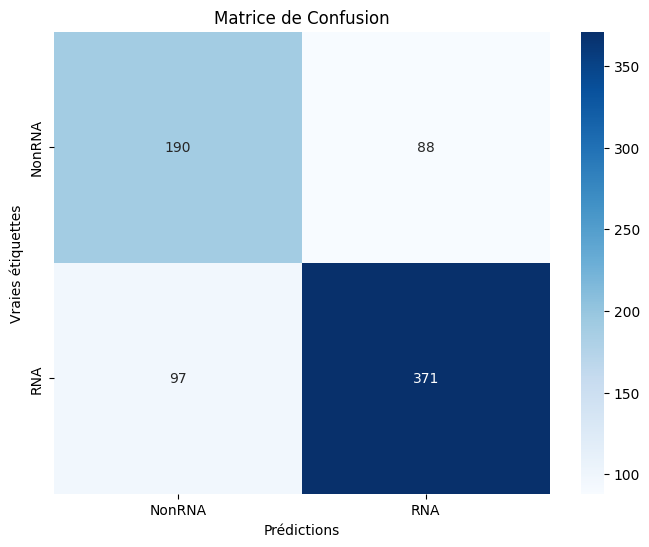

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", xticklabels=['NonRNA', 'RNA'], yticklabels=['NonRNA', 'RNA'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
pip install pydotplus

<ipython-input-29-dd753cf65224>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


                                               Feature  Importance
3                               Note Session 2_Année_N    0.290259
2                               Note Session 1_Année_N    0.254065
4                            Groupe de bac_Bac général    0.084760
102                 Résultat Session 1_Année_N_Ajourné    0.051901
1                                         IPS du lycée    0.031948
..                                                 ...         ...
47   Série du bac_Spé. 1 : LIT_ANGL; Spé. 2 : SC_EC...    0.000000
48   Série du bac_Spé. 1 : LIT_ANGL; Spé. 2 : SC_VI...    0.000000
24                                  Série du bac_STD2A    0.000000
49   Série du bac_Spé. 1 : LIT_ESPA; Spé. 2 : HIST_...    0.000000
23                                   Série du bac_STAV    0.000000

[159 rows x 2 columns]


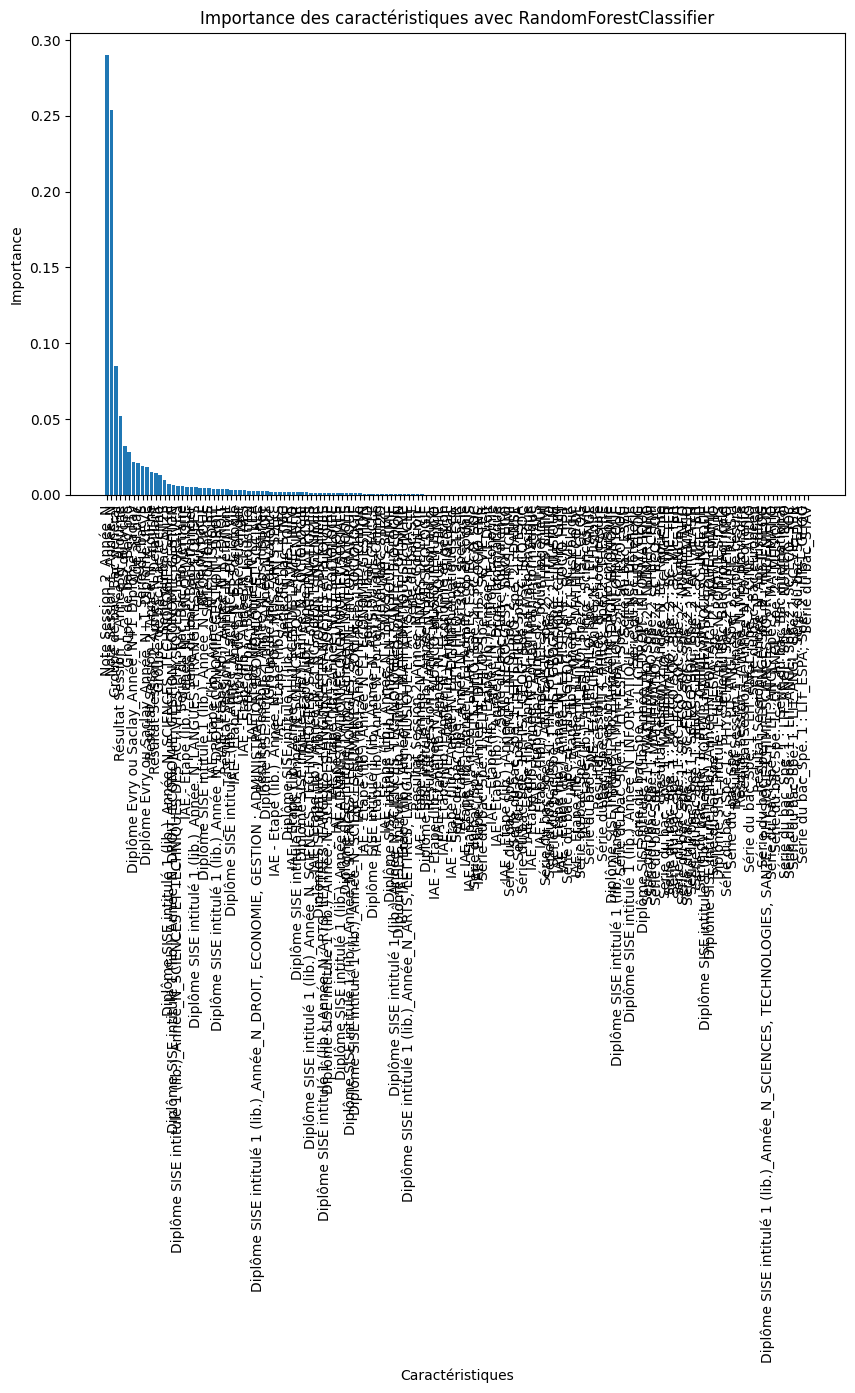

|--- Diplôme Evry ou Saclay_Année_N+1_Diplôme UEVE <= -0.50
|   |--- Groupe de bac_Bac étranger <= 0.50
|   |   |--- class: 0.0
|   |--- Groupe de bac_Bac étranger >  0.50
|   |   |--- IAE - Etape (lib.)_Année_N_L1 Sociologie <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- IAE - Etape (lib.)_Année_N_L1 Sociologie >  0.50
|   |   |   |--- class: 1.0
|--- Diplôme Evry ou Saclay_Année_N+1_Diplôme UEVE >  -0.50
|   |--- IAE - Etape (lib.)_Année_N_L1 PCSPI <= 0.50
|   |   |--- Résultat Session 1_Année_N_Ajourné <= -0.50
|   |   |   |--- Note Session 2_Année_N <= 0.23
|   |   |   |   |--- IAE - Etape (lib.)_Année_N_L1 MUS. ARTS SPEC. <= 0.50
|   |   |   |   |   |--- Note Session 2_Année_N <= -0.01
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Note Session 2_Année_N >  -0.01
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- IAE - Etape (lib.)_Année_N_L1 MUS. ARTS SPEC. >  0.50
|   |   |   |   |   |--- Série du bac_Bac Pro Industriel <= 0.50
|   |   |   |   |   |

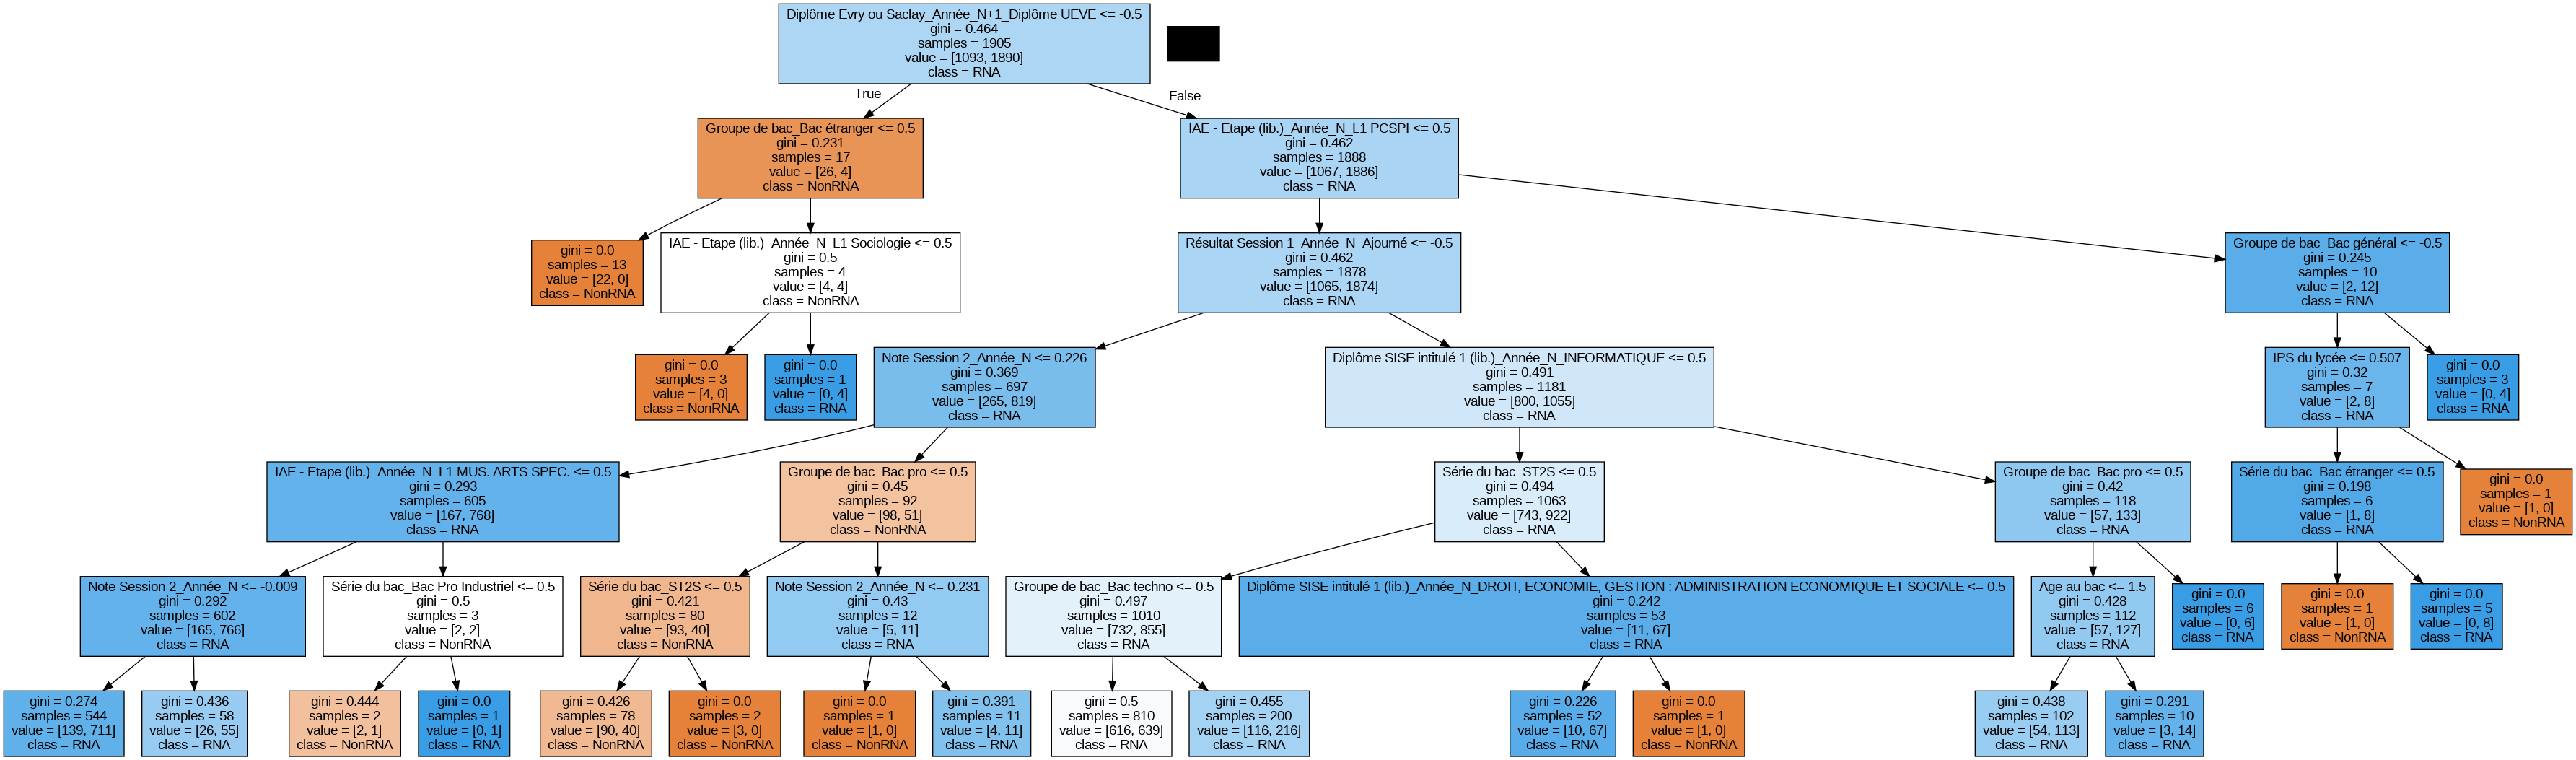

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text,export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image


rf_classifier = RandomForestClassifier(random_state=42,max_depth=6,n_estimators=10)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

feature_importance = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.title('Importance des caractéristiques avec RandomForestClassifier')
plt.show()

tree = rf_classifier.estimators_[0]
tree_text = export_text(tree, feature_names=X_train.columns.tolist())
print(tree_text)

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=X_train.columns, class_names=["NonRNA", "RNA"], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#IPythonImage(graph.create_png())
Image(graph.create_png())

In [ ]:
param_grid = {'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.3]}

# Créez une instance GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=10, scoring='accuracy')

# Effectuez la recherche sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenez les résultats de la recherche
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs paramètres :", best_params)
print("Meilleur score d'accuracy :", best_score)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Meilleurs paramètres : {'ccp_alpha': 0.001}
Meilleur score d'accuracy : 0.7462346524208211


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Évaluation des performances du modèle en utilisant différentes métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


#Calcul des métriques d'évaluation sur l'ensemble train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)

# Affichage des résultats des métriques
print("Métriques pour l'ensemble test:")
print("Exactitude (Accuracy) : {:.4f}".format(accuracy))
print("Précision (Precision) : {:.4f}".format(precision))
print("Rappel (Recall) : {:.4f}".format(recall))
print("F1-score : {:.4f}".format(f1))
print("AUC : {:.4f}".format(roc_auc))

# Affichage des métriques pour l'ensemble d'entraînement
print("Métriques pour l'ensemble d'entraînement:")
print("Exactitude (Accuracy) :", train_accuracy)
print("Précision (Precision) :", train_precision)
print("Rappel (Recall) :", train_recall)
print("F1-score :", train_f1)
print("AUC :", train_auc)

<ipython-input-31-7f3b477409c7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)


Métriques pour l'ensemble test:
Exactitude (Accuracy) : 0.7601
Précision (Precision) : 0.7604
Rappel (Recall) : 0.9017
F1-score : 0.8250
AUC : 0.7116
Métriques pour l'ensemble d'entraînement:
Exactitude (Accuracy) : 0.7700301709688233
Précision (Precision) : 0.7710237659963437
Rappel (Recall) : 0.9011752136752137
F1-score : 0.8310344827586206
AUC : 0.7251150595828814


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

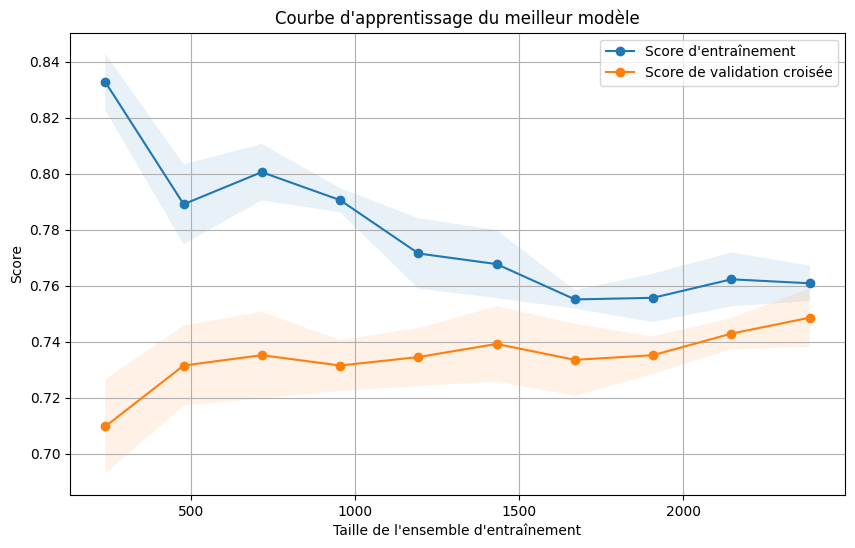

In [ ]:

#Définition de la taille des ensembles d'entrainement
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcul des courbes d'apprentissage avec le meilleur estimateur
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy'
)

# Calcul des moyennes et écart-types des scores d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Score d\'entraînement')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, 'o-', label='Score de validation croisée')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage du meilleur modèle')
plt.legend(loc='best')
plt.grid(True)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Métriques pour l'ensemble test:
Exactitude (Accuracy) : 0.7601
Précision (Precision) : 0.8004
Rappel (Recall) : 0.8226
F1-score : 0.8114
AUC : 0.7387


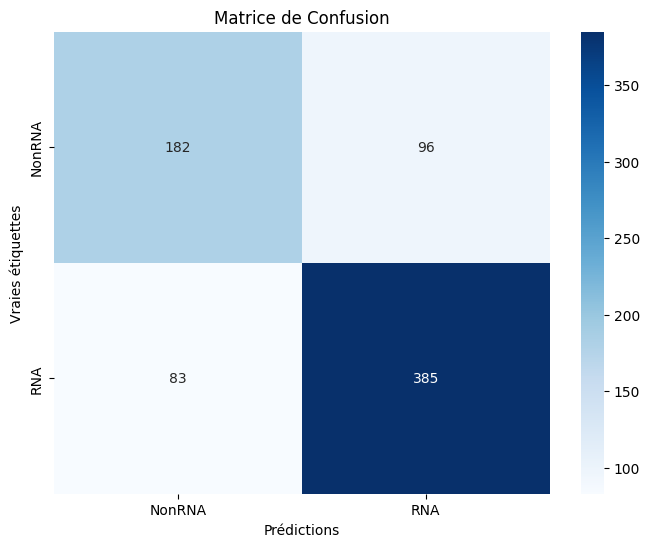

In [ ]:
from sklearn.linear_model import LogisticRegression


# Création d'un modèle de régression logistique
logreg_model = LogisticRegression(random_state=42)

# Entraînement du modèle sur les données d'entraînement
logreg_model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = logreg_model.predict(X_test)

# Calcul des métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Affichage des résultats des métriques
print("Métriques pour l'ensemble test:")
print("Exactitude (Accuracy) : {:.4f}".format(accuracy))
print("Précision (Precision) : {:.4f}".format(precision))
print("Rappel (Recall) : {:.4f}".format(recall))
print("F1-score : {:.4f}".format(f1))
print("AUC : {:.4f}".format(roc_auc))

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", xticklabels=['NonRNA', 'RNA'], yticklabels=['NonRNA', 'RNA'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

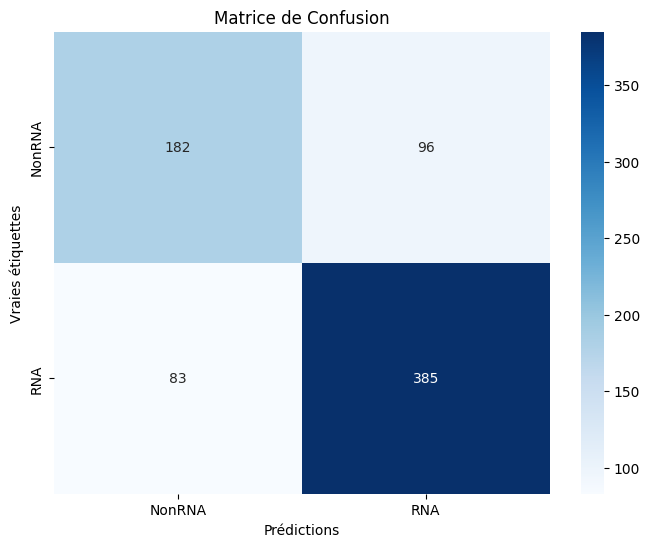

In [ ]:
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", xticklabels=['NonRNA', 'RNA'], yticklabels=['NonRNA', 'RNA'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
y_train_pred = logreg_model.predict(X_train)

# Évaluation des performances du modèle en utilisant différentes métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


#Calcul des métriques d'évaluation sur l'ensemble train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)

# Affichage des résultats des métriques
print("Métriques pour l'ensemble test:")
print("Exactitude (Accuracy) : ",accuracy)
print("Précision (Precision) : ",precision)
print("Rappel (Recall) : ",recall)
print("F1-score :",f1)
print("AUC : ",roc_auc)

# Affichage des métriques pour l'ensemble d'entraînement
print("Métriques pour l'ensemble d'entraînement:")
print("Exactitude (Accuracy) :", train_accuracy)
print("Précision (Precision) :", train_precision)
print("Rappel (Recall) :", train_recall)
print("F1-score :", train_f1)
print("AUC :", train_auc)

Métriques pour l'ensemble test:
Exactitude (Accuracy) : 0.7601
Précision (Precision) : 0.8004
Rappel (Recall) : 0.8226
F1-score : 0.8114
AUC : 0.7387
Métriques pour l'ensemble d'entraînement:
Exactitude (Accuracy) : 0.7552799195440831
Précision (Precision) : 0.7907331975560081
Rappel (Recall) : 0.8295940170940171
F1-score : 0.8096976016684044
AUC : 0.7298285116973235


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

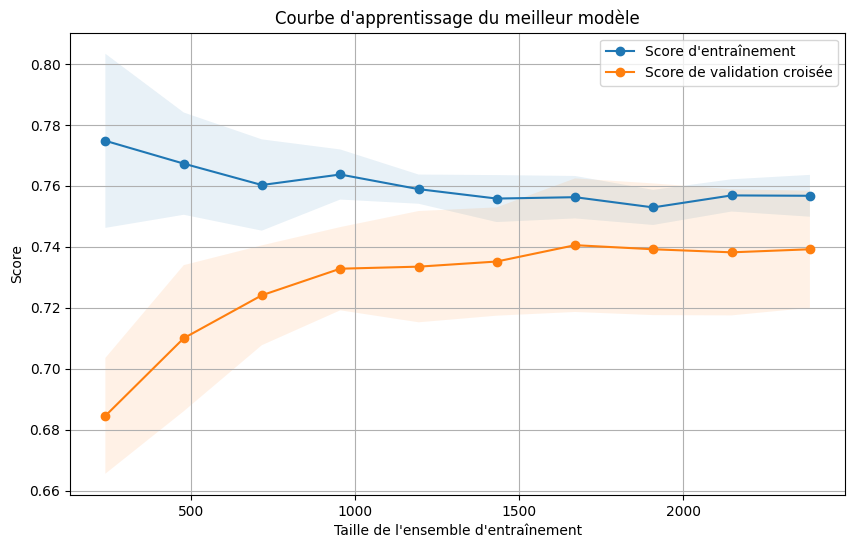

In [ ]:
#Définition de la taille des ensembles d'entrainement
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcul des courbes d'apprentissage avec le meilleur estimateur
train_sizes, train_scores, test_scores = learning_curve(
    logreg_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy'
)

# Calcul des moyennes et écart-types des scores d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Score d\'entraînement')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, 'o-', label='Score de validation croisée')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage du meilleur modèle')
plt.legend(loc='best')
plt.grid(True)

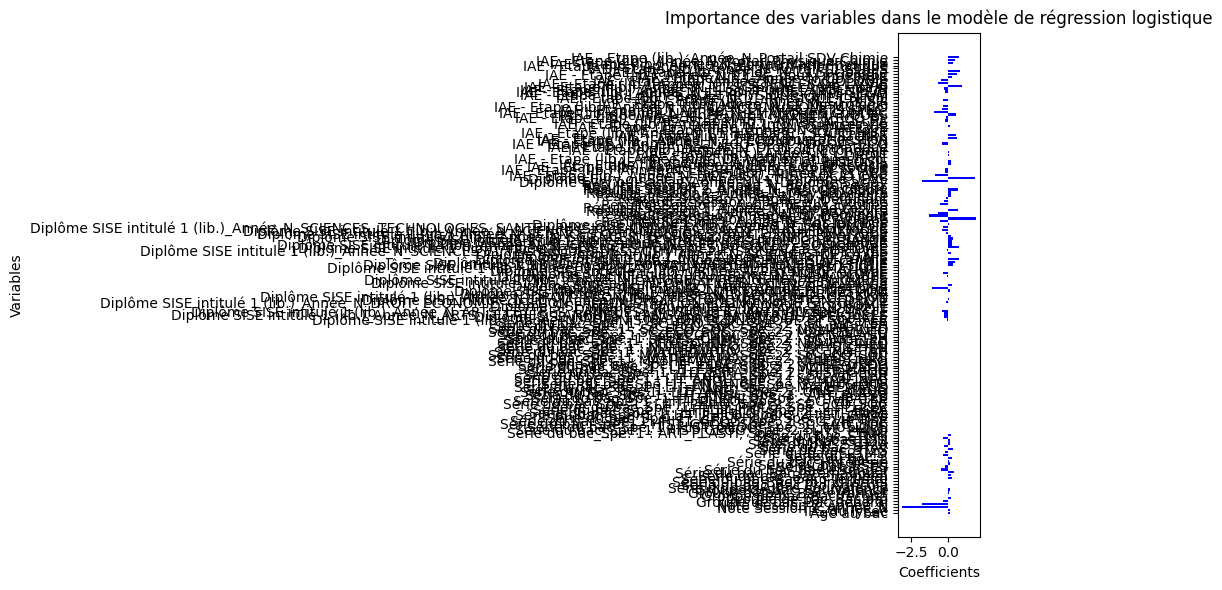

In [ ]:
# coefficients du modèle de régression logistique
coefficients = logreg_model.coef_[0]

# noms des variables
variable_names = list(X_train.columns)

#Une figure et un axe pour le graphique
fig, ax = plt.subplots(figsize=(10, 6))

#graphique en barres horizontales
ax.barh(variable_names, coefficients, color='b')

#étiquettes pour l'axe x et y
ax.set_xlabel('Coefficients')
ax.set_ylabel('Variables')
ax.set_title('Importance des variables dans le modèle de régression logistique')

# Affichage du graphique
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Meilleurs paramètres: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Précision du meilleur modèle: 0.7627345844504021


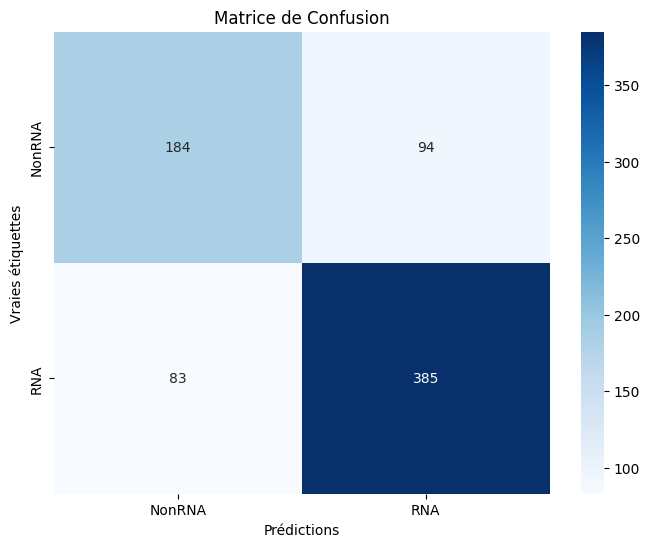

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],        # Paramètre de régularisation
    'penalty': ['l1', 'l2'],        # Type de régularisation (L1 ou L2)
    'solver': ['liblinear', 'saga'] # Algorithme d'optimisation
}
grid_search = GridSearchCV(logreg_model, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Précision du meilleur modèle:", accuracy)

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", xticklabels=['NonRNA', 'RNA'], yticklabels=['NonRNA', 'RNA'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
y_train_pred = best_model.predict(X_train)

# Évaluation des performances du modèle en utilisant différentes métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


#Calcul des métriques d'évaluation sur l'ensemble train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)

# Affichage des résultats des métriques
print("Métriques pour l'ensemble test:")
print("Exactitude (Accuracy) : ",accuracy)
print("Précision (Precision) : ",precision)
print("Rappel (Recall) : ",recall)
print("F1-score : ",f1)
print("AUC : ",roc_auc)

# Affichage des métriques pour l'ensemble d'entraînement
print("Métriques pour l'ensemble d'entraînement:")
print("Exactitude (Accuracy) :", train_accuracy)
print("Précision (Precision) :", train_precision)
print("Rappel (Recall) :", train_recall)
print("F1-score :", train_f1)
print("AUC :", train_auc)

Métriques pour l'ensemble test:
Exactitude (Accuracy) : 0.7627
Précision (Precision) : 0.8038
Rappel (Recall) : 0.8226
F1-score : 0.8131
AUC : 0.7423
Métriques pour l'ensemble d'entraînement:
Exactitude (Accuracy) : 0.7556151525310091
Précision (Precision) : 0.7914329423763387
Rappel (Recall) : 0.8290598290598291
F1-score : 0.8098095486564049
AUC : 0.7304615076892306


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

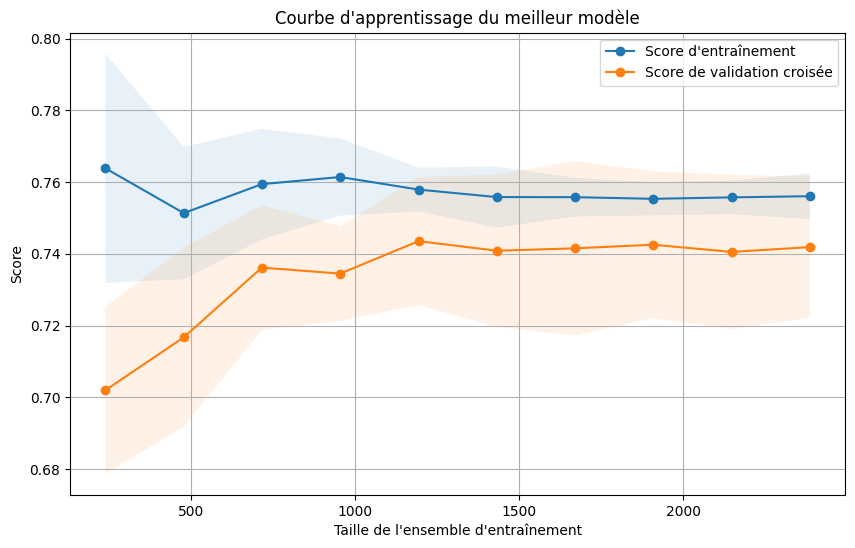

In [ ]:
#Définition de la taille des ensembles d'entrainement
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcul des courbes d'apprentissage avec le meilleur estimateur
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy'
)

# Calcul des moyennes et écart-types des scores d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Score d\'entraînement')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, 'o-', label='Score de validation croisée')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage du meilleur modèle')
plt.legend(loc='best')
plt.grid(True)

In [ ]:
X_2021 = data2021.drop('RNA', axis=1)
#del X_2021['Discipline SISE (lib.)_Année_N']
#del X_2021['Secteur disciplinaire SISE (lib.)_Année_N']
#del X_2021['Composante_Année_N']


predictions_2021 = logreg_model.predict(X_2021)


In [ ]:
predictions_df = pd.DataFrame({'Predictions_RNA': predictions_2021}
    )
data2021=data2021.reset_index(drop=True)

In [ ]:
df2021=data2021.copy()

In [ ]:
dat2021['Predictions_RNA']=predictions_df['Predictions_RNA']
dat2021.shape

(499, 18)

In [ ]:
predictions_proba_2021 = logreg_model.predict_proba(X_2021)

In [ ]:

predicted_class_probabilities = 100*predictions_proba_2021[:, 1]


df_predictions = pd.DataFrame(predicted_class_probabilities, columns=['Probabilité_RNA'])

In [ ]:
dat2021=dat2021.reset_index(drop=True)


In [ ]:
df2021_with_probabilities = dat2021.assign(Probabilité_RNA=df_predictions['Probabilité_RNA'])
df2021_with_probabilities=df2021_with_probabilities.assign(Prediction_RNA_2022=predictions_df['Predictions_RNA'])

In [ ]:
df2021_with_probabilities=df2021_with_probabilities.reset_index(drop=True)

In [ ]:
for i in range(len(df2021_with_probabilities)):
  if df2021_with_probabilities['Prediction_RNA_2022'][i]==1:
    df2021_with_probabilities['Predictions_RNA'][i]="RNA"
  else:
    df2021_with_probabilities['Predictions_RNA'][i]="NonRNA"

<ipython-input-54-8b2554d58124>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021_with_probabilities['Predictions_RNA'][i]="RNA"


In [ ]:
data2021=df2021_with_probabilities[['Individu - Code Etudiant','Note Session 1_Année_N','Résultat Session 1_Année_N','Note Session 2_Année_N','Résultat Session 2_Année_N','Série du bac','Predictions_RNA','Probabilité_RNA']].copy()

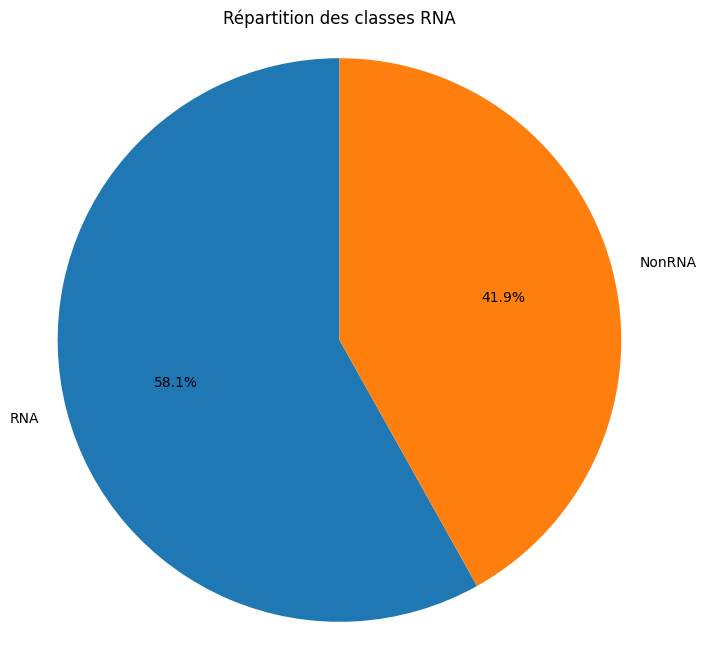

In [ ]:
class_counts = data2021['Predictions_RNA'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Répartition des classes RNA')

plt.show()

In [ ]:
file='prediction_licence1.xlsx'
data2021.to_excel(file)
print("Success")

Success
